## Salary Data Analysis

#### Import libraries and dataset

In [2]:
# import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# import dataset
df = pd.read_csv("Salary_Data.csv")
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


#### Data Cleaning and Preparation

In [3]:
# Get number of rows and columns
df.shape

(6704, 6)

In [4]:
# Check for missing values
df[df.isnull().any(axis=1)]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN
2011,27.0,Male,NaN,Developer,7.0,100000.0
3136,31.0,Male,Master's Degree,Full Stack Engineer,8.0,NaN
5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN
6455,36.0,Male,Bachelor's Degree,Sales Director,6.0,NaN


In [5]:
# Remove rows with missing data
data = df.dropna()
data.isnull().sum()


Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [6]:
# Get number of rows and coluumns
data.shape

(6698, 6)

In [7]:
# Get info about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6698 non-null   object 
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   float64
dtypes: float64(3), object(3)
memory usage: 366.3+ KB


In [8]:
# Summary statistics of dataset
data.describe()

,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.623022,8.095178,115329.253061
std,7.615784,6.060291,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


#### Business Problem 1 - Is the workforce well-balanced?

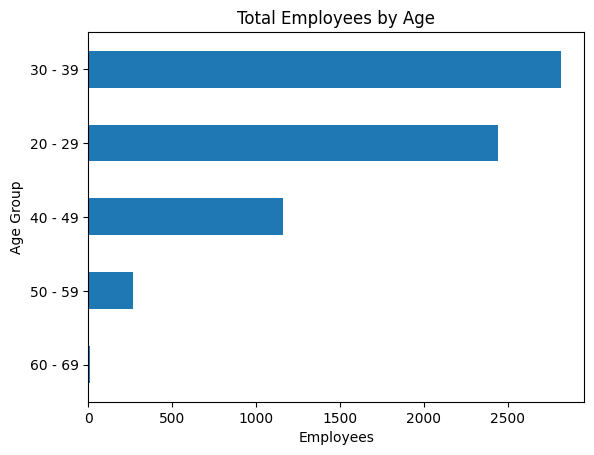

In [13]:
# Total employees by age group

# Create age group
bins = [20, 29, 39, 49, 59, 69]
labels = ["20 - 29", "30 - 39", "40 - 49", "50 - 59", "60 - 69"]
age_group = pd.cut(data["Age"], bins=bins, labels=labels, right=True)

# Add age_group to dataframe
data.loc[:, "age_group"] = age_group
data.head()

# Find total employees per age group
total_empl_by_age = data["age_group"].value_counts(ascending=True)

# Visualize result
total_empl_by_age.plot(kind="barh")
plt.title("Total Employees by Age")
plt.xlabel("Employees")
plt.ylabel("Age Group")
plt.show()



In [10]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,age_group
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,30 - 39
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,20 - 29
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,40 - 49
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,30 - 39
4,52.0,Male,Master's,Director,20.0,200000.0,50 - 59


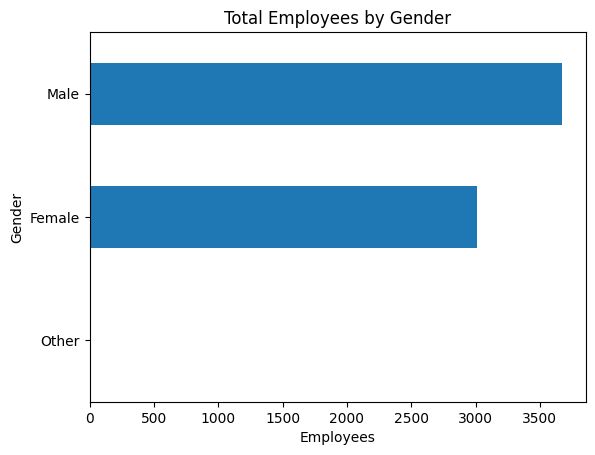

In [15]:
# Total employees by gender
total_empl_by_gender = data["Gender"].value_counts(ascending=True)

# Visualize
total_empl_by_gender.plot(kind="barh")
plt.title("Total Employees by Gender")
plt.xlabel("Employees")
plt.ylabel("Gender")
plt.show()


#### Business Problem 2 - Are there any unfair differences in pay across groups?

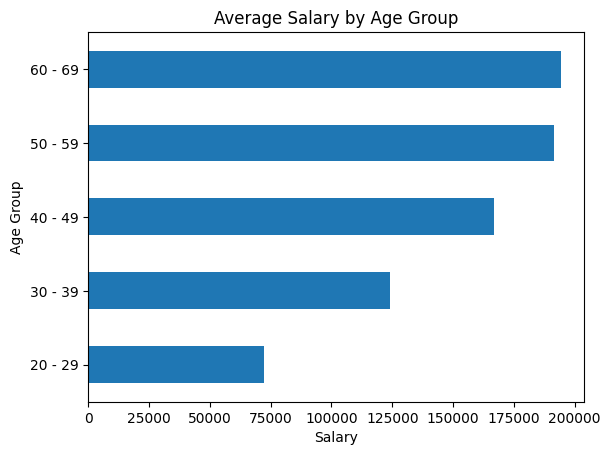

In [31]:
# Pay accross age groups
pay_age = data.groupby("age_group", observed=False)["Salary"].mean()


# Visualize
pay_age.plot(kind="barh")
plt.title("Average Salary by Age Group")
plt.xlabel("Salary")
plt.ylabel("Age Group")
plt.show()

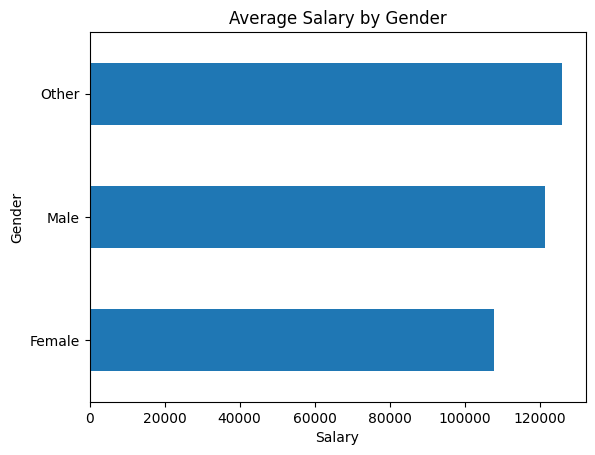

In [37]:
# Pay accross gender
pay_gender = data.groupby("Gender", observed=False)["Salary"].mean()

# Visualize
pay_gender.plot(kind="barh")
plt.title("Average Salary by Gender")
plt.xlabel("Salary")
plt.ylabel("Gender")
plt.show()